In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
diamonds = pd.read_csv("../input/train.csv")

### Exploramos los datos para su analisis

In [3]:
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


### Features
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

In [4]:
diamonds.shape

(40455, 11)

In [5]:
diamonds["color"].value_counts()

G    8565
E    7344
F    7162
H    6147
D    5063
I    4052
J    2122
Name: color, dtype: int64

In [6]:
diamonds.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

<AxesSubplot:>

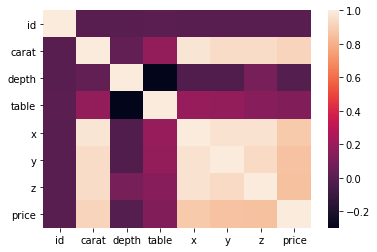

In [7]:
sns.heatmap(diamonds.corr())

In [8]:
diamonds["price"].describe()

count    40455.000000
mean      3938.101125
std       3992.645108
min        326.000000
25%        948.000000
50%       2401.000000
75%       5333.000000
max      18818.000000
Name: price, dtype: float64

### Here we convert those object variables into numerical with Label Encoder

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
diamonds["color_numeric"] = le.fit_transform(diamonds["color"])

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
diamonds["cut_numeric"] = le.fit_transform(diamonds["cut"])

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
diamonds["clarity_numeric"] = le.fit_transform(diamonds["clarity"])

In [12]:
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,color_numeric,cut_numeric,clarity_numeric
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363,4,3,2
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593,1,4,3
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534,0,4,3
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212,1,2,4
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447,2,4,3


### We drop the unnecesary columns for our predictions

In [13]:
diamonds_clean = diamonds.drop(["cut","color","clarity"],axis=1)

In [14]:
diamonds_clean

,id,carat,depth,table,x,y,z,price,color_numeric,cut_numeric,clarity_numeric
0,0,1.12,61.6,59.0,6.67,6.63,4.10,5363,4,3,2
1,1,1.14,60.0,54.0,6.74,6.97,4.11,5593,1,4,3
2,2,0.90,60.3,63.0,6.12,6.22,3.72,3534,0,4,3
3,3,0.71,61.9,54.0,5.74,5.76,3.56,3212,1,2,4
4,4,0.34,60.0,62.0,4.51,4.55,2.72,447,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.90,63.8,58.0,6.13,6.09,3.90,4120,0,1,2
40451,40451,0.35,62.0,54.0,4.56,4.57,2.83,1266,0,2,6
40452,40452,0.90,58.4,55.0,6.34,6.39,3.72,3269,3,1,3
40453,40453,1.21,63.6,56.0,6.63,6.68,4.23,5893,4,1,2


### We then create the model to study our predictions
- We start with a Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
diamonds_model = LinearRegression()
X = diamonds_clean[["carat","depth","table","x","y","z","color_numeric","cut_numeric","clarity_numeric"]]
y = diamonds_clean["price"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333333)


In [17]:
diamonds_model.fit(X_train, y_train)
print('Coefficients', diamonds_model.coef_)
print(f'Intercept {diamonds_model.intercept_}')

Coefficients [10908.16728572  -148.80371019   -91.47498215 -2034.92220191
  1020.0544194   -148.36765343  -262.26430894    69.66783172
   292.60776853]
Intercept 15398.875950268492


In [18]:
y_pred = diamonds_model.predict(X_test)
print(y_pred)

[ 721.02736641 1729.63855093 -414.0072012  ... 4354.62565911  437.41883679
  976.79899558]


In [19]:
result = pd.DataFrame({
    "y_pred":y_pred,
    "gt":y_test
})
result

,y_pred,gt
10700,721.027366,802
561,1729.638551,1122
6057,-414.007201,1074
36077,2614.179511,1919
346,10983.996565,10338
...,...,...
18903,9792.572625,11820
3471,893.849664,980
29873,4354.625659,4174
10348,437.418837,654


In [20]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,max_error,explained_variance_score
print("===== Metrics ======")
print("")
print(f"Explained variance score ={explained_variance_score(y_pred, y_test)}")
print(f"R squared score = {r2_score(y_pred, y_test)}")
print(f"MSE(Mean Squared Error) ={mean_squared_error(y_pred, y_test)}")
print(f"MAE(Mean Absolute Error) ={mean_absolute_error(y_pred, y_test)}")
print(f"ME(Maximum residual Error) ={max_error(y_pred, y_test)}")






===== Metrics ======

Explained variance score =0.852823234497055
R squared score = 0.8528050538138894
MSE(Mean Squared Error) =2134225.778051146
MAE(Mean Absolute Error) =877.6892767568971
ME(Maximum residual Error) =53487.20897652462


### Now we predict without ground truth

In [21]:
prediamonds = pd.read_csv("../input/predict.csv")

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
prediamonds["color_numeric"] = le.fit_transform(prediamonds["color"])

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
prediamonds["cut_numeric"] = le.fit_transform(prediamonds["cut"])

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
prediamonds["clarity_numeric"] = le.fit_transform(prediamonds["clarity"])

In [25]:
prediamonds_clean = prediamonds.drop(["cut","color","clarity","id"],axis=1)

In [26]:
kaggle_pred = diamonds_model.predict(prediamonds_clean)

In [27]:
prediamonds_clean

,carat,depth,table,x,y,z,color_numeric,cut_numeric,clarity_numeric
0,0.33,62.0,58.0,4.44,4.46,2.76,5,4,1
1,1.21,62.4,58.0,6.77,6.83,4.24,0,4,3
2,1.06,59.3,60.0,6.64,6.71,3.96,0,4,2
3,0.36,61.4,57.0,4.64,4.61,2.54,1,2,6
4,0.70,62.3,54.0,5.67,5.72,3.55,1,2,4
...,...,...,...,...,...,...,...,...,...
13480,2.04,61.9,60.0,8.15,8.11,5.03,0,1,2
13481,0.31,61.7,55.0,4.37,4.39,2.70,3,2,1
13482,0.52,62.0,56.0,5.14,5.18,3.20,0,2,7
13483,0.50,59.1,58.0,5.23,5.19,3.08,2,3,2


In [28]:
kaggle_pred

array([-1167.95688086,  7724.82204472,  6258.00701949, ...,
        3259.88923331,  1217.26871845,  1516.92772961])

In [261]:
diamonds_model.score(X,y)

0.8787832626549682

In [29]:
result = pd.DataFrame({
    "price":kaggle_pred
})
result.index.name = 'id'

In [30]:
result

,price
id,
0,-1167.956881
1,7724.822045
2,6258.007019
3,1491.470367
4,3641.972522
...,...
13480,14548.708091
13481,-601.918409
13482,3259.889233


In [31]:
result.to_csv (r'../predict1.csv')


### Training model 2
- Random Forest


In [32]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators= 200)

In [33]:
X1 = diamonds_clean[["carat","depth","table","x","y","z","color_numeric","cut_numeric","clarity_numeric"]]
y1 = diamonds_clean["price"]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

In [35]:
forest_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200)

In [36]:
kaggle_pred2 = forest_model.predict(prediamonds_clean)

In [262]:
forest_model.score(X1,y1)

0.9937967077412773

In [38]:
result1 = pd.DataFrame({
    "price":kaggle_pred2
})
result1.index.name = 'id'

In [ ]:
result1

In [ ]:
result1.to_csv (r'../predict3.csv')


### Training Model 3
- AdaBoostRegressor


In [39]:
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor(n_estimators= 100)

In [40]:
X2 = diamonds_clean[["carat","depth","table","x","y","z","color_numeric","cut_numeric","clarity_numeric"]]
y2 = diamonds_clean["price"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

In [42]:
ada_model.fit(X_train, y_train)


AdaBoostRegressor(n_estimators=100)

In [43]:
kaggle_pred3 = ada_model.predict(prediamonds_clean)

In [44]:
result3 = pd.DataFrame({
    "price":kaggle_pred3
})
result3.index.name = 'id'

In [45]:
result3

,price
id,
0,1531.475490
1,8227.662500
2,7069.396782
3,1654.973345
4,4082.900982
...,...
13480,14915.009663
13481,1531.475490
13482,3051.710526


In [54]:
result3.to_csv (r'../predict4.csv')


In [62]:
ada_model.score(X2,y2)

0.8640213970208314

### Training model 4
- Random Forest

In [246]:
forest_model1 = RandomForestRegressor(n_estimators= 200)

In [247]:
X3 = diamonds_clean[["carat","depth","table","x","y","z","color_numeric","cut_numeric","clarity_numeric"]]
y3 = diamonds_clean["price"]

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.1)

In [249]:
forest_model1.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200)

In [250]:
kaggle_pred4 = forest_model1.predict(prediamonds_clean)

In [251]:
forest_model1.score(X3,y3)

0.9954928045394177

In [111]:
result5 = pd.DataFrame({
    "price":kaggle_pred4
})
result5.index.name = 'id'

In [112]:
result5

,price
id,
0,831.160000
1,6167.286667
2,5935.053333
3,1127.413333
4,3315.386667
...,...
13480,16558.506667
13481,895.445333
13482,2508.560000


In [113]:
result5.to_csv (r'../predict6.csv')


In [103]:
prediction = prediamonds_clean.drop(["carat","depth","table"],axis=1)

In [140]:
best = 0.996349311869268

### Training Model 5
- ExtraTreesRegressor

In [211]:
from sklearn.ensemble import ExtraTreesRegressor

In [252]:
extratrees_model = ExtraTreesRegressor(n_estimators= 200)

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.01)

In [254]:
extratrees_model.fit(X_train, y_train)


ExtraTreesRegressor(n_estimators=200)

In [255]:
extratrees_model.score(X3,y3)

0.9998712495745308

In [256]:
kaggle_pred6 = extratrees_model.predict(prediamonds_clean)

In [257]:
result7 = pd.DataFrame({
    "price":kaggle_pred6
})
result7.index.name = 'id'

In [258]:
result7

,price
id,
0,772.405
1,6035.060
2,5821.770
3,1094.680
4,3289.055
...,...
13480,16738.930
13481,888.670
13482,2404.275


In [259]:
result7.to_csv (r'../predict8.csv')
